In [1]:
from train_cae import *

2024-07-04 11:14:33.435808: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# 1. data
# load data
train_images, train_labels, test_images, test_labels = mnist_data()
samples, sample_labels = sample_and_categorize(train_images, train_labels, number=60000)
# samples, sample_labels = sample_and_categorize(train_images, train_labels)
samples_test, sample_labels_test = sample_and_categorize(test_images, test_labels)
print(samples.shape)
print(sample_labels.shape)

(60000, 28, 28, 1)
(60000,)


In [ ]:
y_train = np.reshape(samples, (-1, 784))
x_train = y_train + np.random.normal(0, 0.01, size=y_train.shape)
print(x_train.shape)
print(y_train.shape)

In [6]:
model_pre = CAE(latent_dim=12, name="cae")

# Fit the model. Note that the 'eps' input is ignored because it is an Input tensor.
history = model_pre.model.fit(x_train, y_train, epochs=200, batch_size=100)

600/600 [==============================] - 121s 200ms/step - loss: 0.1771


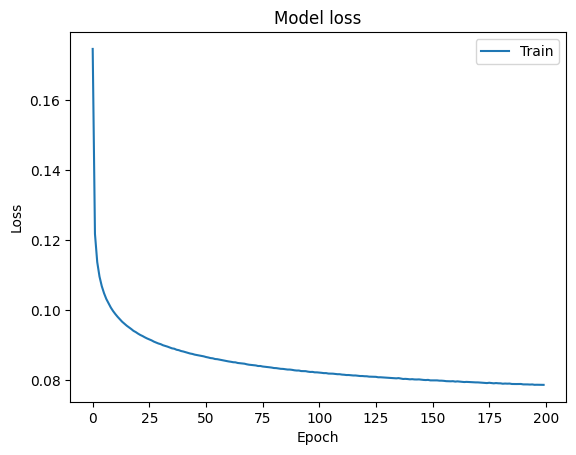

In [22]:
plot_learning_curve(history)

In [20]:
model_pre.save()

In [8]:
def plot_learning_curve(history):
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper right')
    plt.savefig('trained_models/learning_curve.pdf')
    plt.show()

In [9]:
samples, sample_labels = sample_and_categorize(train_images, train_labels)
samples_test, sample_labels_test = sample_and_categorize(test_images, test_labels)

----------------------------------------------------------------
----------------------------------------------------------------
----------------------------------------------------------------
----------------------------------------------------------------
----------------------------------------------------------------
----------------------------------------------------------------
----------------------------------------------------------------
----------------------------------------------------------------
----------------------------------------------------------------
----------------------------------------------------------------


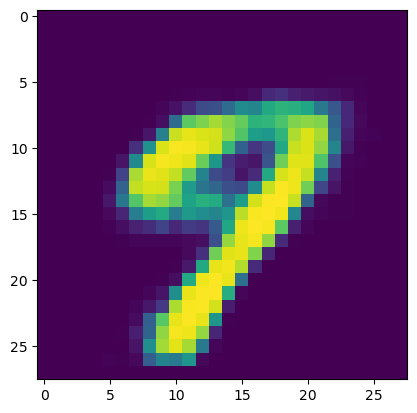

In [12]:
# show example
x_test = np.reshape(samples_test, (-1, 784))
for i in range(10):
    # Extract the current sample and add batch dimension
    sample = np.expand_dims(x_test[i], axis=0)
    embed = model_pre.encoder(sample)
    img = model_pre.decoder(embed)
    plt.imshow(np.reshape(x_test[i], (28, 28)))
    plt.imshow(np.reshape(img, (28, 28)))
    print("-"*64)